In [32]:
import pandas as pd #importing pandas library - used for managing dataframe
import numpy as np #importing numpy - used for mathematical calculations
from sklearn.model_selection import train_test_split #used for splitting train and test data
from xgboost import XGBClassifier #importing XGBoost
#importing some performance metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dataframe = pd.read_csv('Final_URL_Data.csv') #reading csv file
dataframe.head() #head of the dataframe

,url,length_url,ip,nb_dots,nb_hyphens,nb_at,nb_slash,nb_dslash,https_token,ratio_digits_url,...,right_clic,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,0,3,0,0,3,0,1,0.000000,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,1,1,0,0,5,0,1,0.220779,...,0,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,1,4,1,0,5,0,0,0.150794,...,0,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,0,2,0,0,2,0,1,0.000000,...,0,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,0,2,2,0,5,0,1,0.000000,...,0,1,0,224,8175,8725,0,0,6,0


In [34]:
dataframe.shape

(11430, 24)

In [35]:
dataframe.columns

Index(['url', 'length_url', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_slash',
       'nb_dslash', 'https_token', 'ratio_digits_url', 'prefix_suffix',
       'shortening_service', 'nb_hyperlinks', 'iframe', 'right_clic',
       'domain_with_copyright', 'whois_registered_domain',
       'domain_registration_length', 'domain_age', 'web_traffic', 'dns_record',
       'google_index', 'page_rank', 'status'],
      dtype='object')

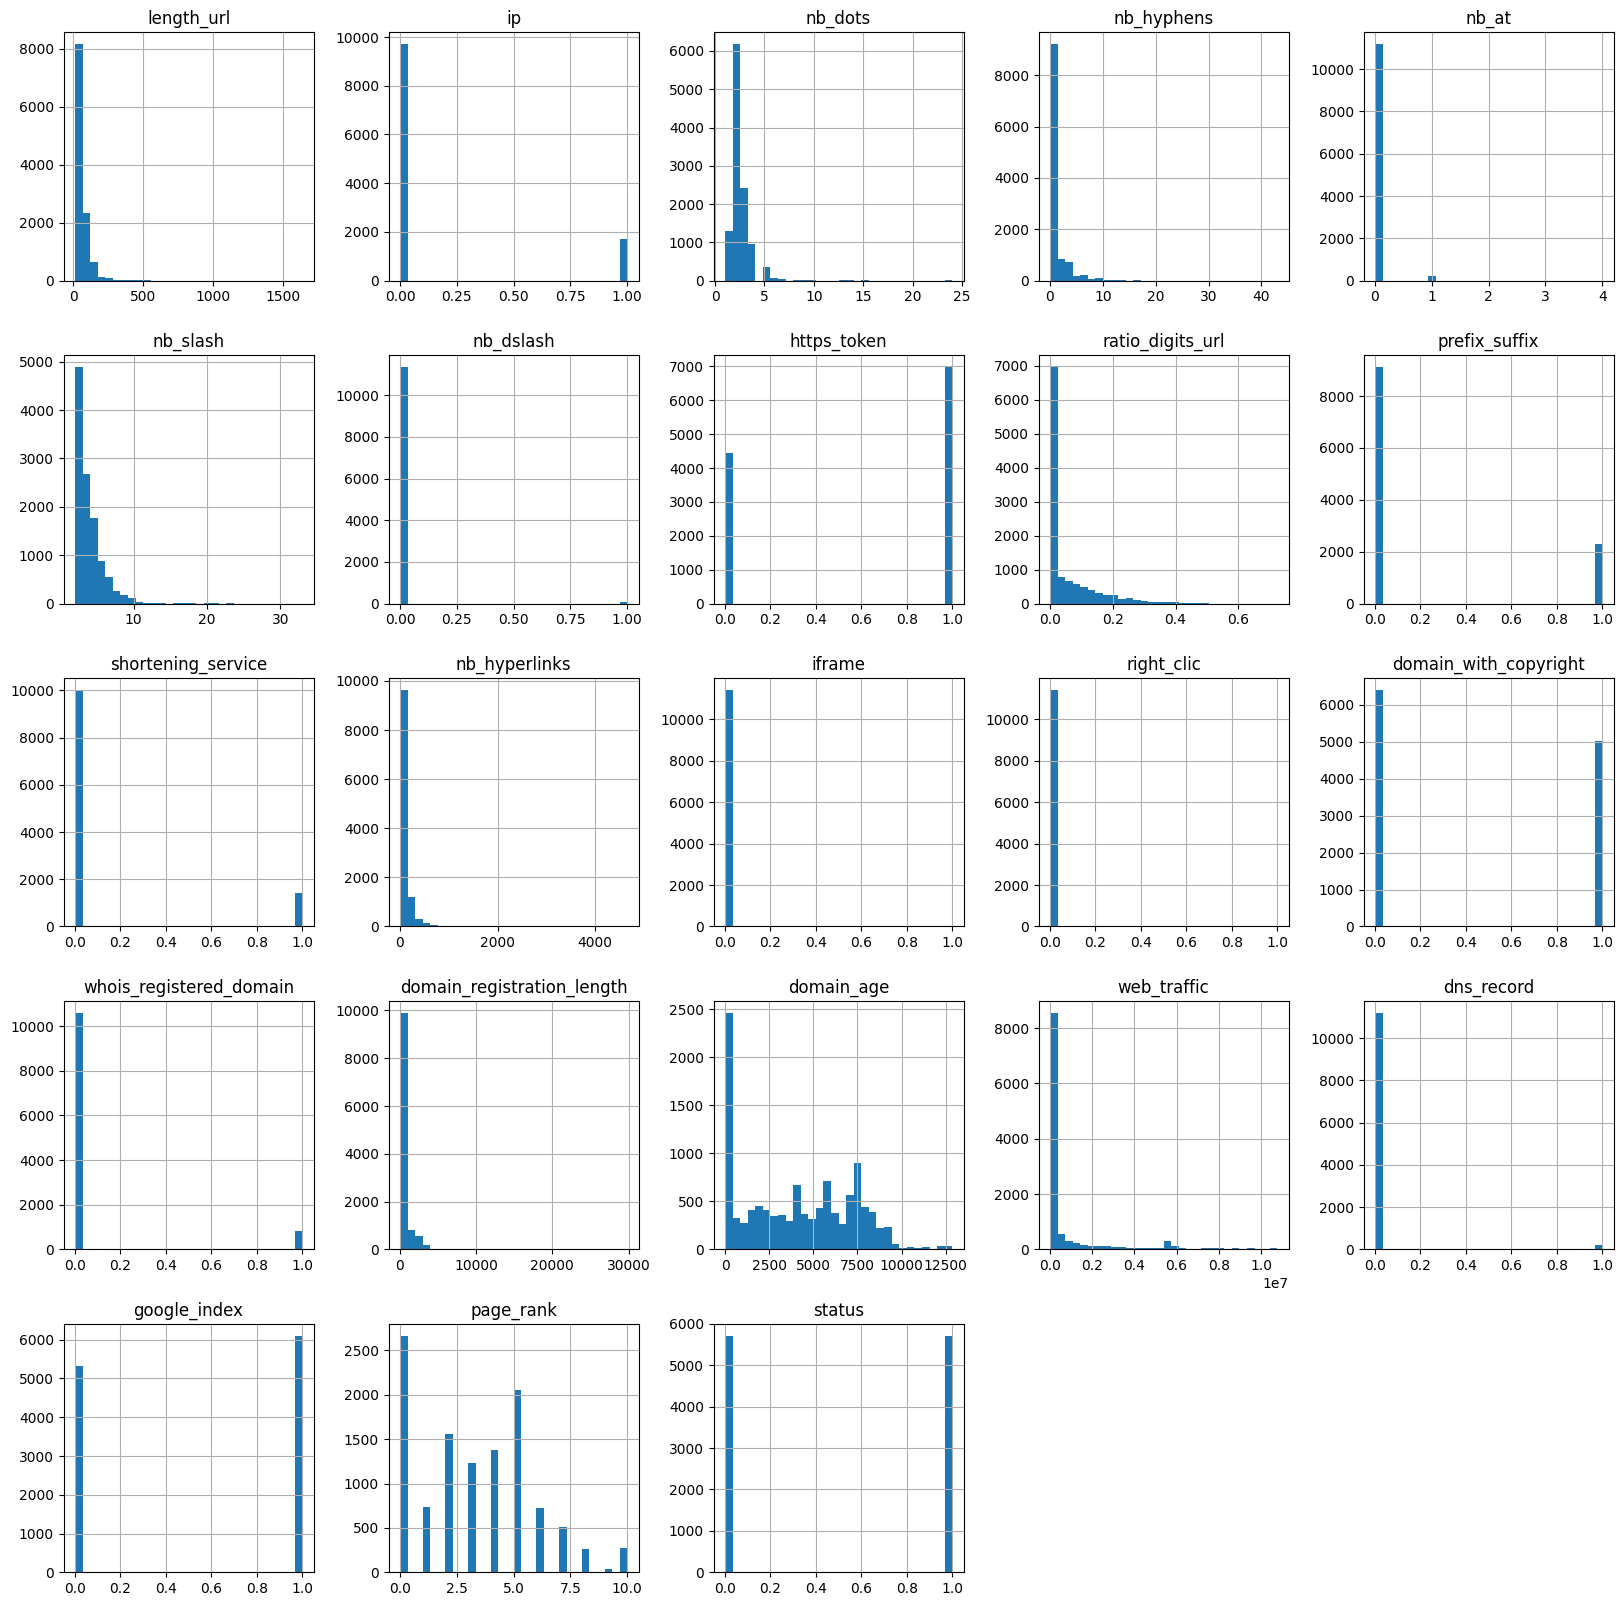

In [37]:
#Data Visualization
#Histogram
dataframe.hist(bins = 30,figsize = (20,20))
plt.show()

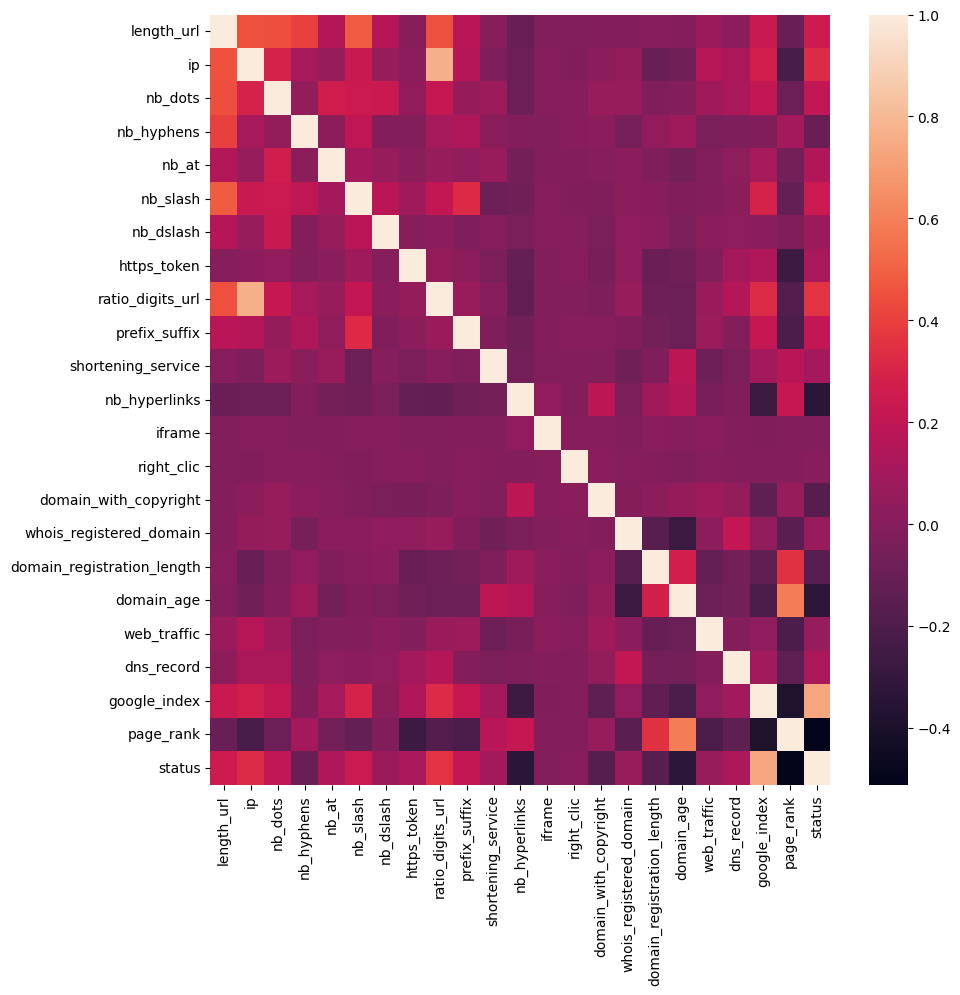

In [38]:
#Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr())
plt.show()

In [39]:
#Data Analysis
dataframe.describe()

,length_url,ip,nb_dots,nb_hyphens,nb_at,nb_slash,nb_dslash,https_token,ratio_digits_url,prefix_suffix,...,right_clic,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,0.150569,2.480752,0.997550,0.022222,4.289589,0.006562,0.610936,0.053137,0.202450,...,0.00140,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,0.357644,1.369686,2.087087,0.155500,1.882251,0.080742,0.487559,0.089363,0.401843,...,0.03739,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,0.000000,3.000000,1.000000,0.000000,5.000000,0.000000,1.000000,0.079365,0.000000,...,0.00000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,1.000000,24.000000,43.000000,4.000000,33.000000,1.000000,1.000000,0.723881,1.000000,...,1.00000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [40]:
#Dropping url column as it is no a numerical value
df = dataframe.drop(['url'], axis = 1).copy()
df.head()

,length_url,ip,nb_dots,nb_hyphens,nb_at,nb_slash,nb_dslash,https_token,ratio_digits_url,prefix_suffix,...,right_clic,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,0,3,0,0,3,0,1,0.000000,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,1,1,0,0,5,0,1,0.220779,0,...,0,0,0,77,5767,0,0,1,2,1
2,126,1,4,1,0,5,0,0,0.150794,1,...,0,0,0,14,4004,5828815,0,1,0,1
3,18,0,2,0,0,2,0,1,0.000000,0,...,0,0,0,62,-1,107721,0,0,3,0
4,55,0,2,2,0,5,0,1,0.000000,0,...,0,1,0,224,8175,8725,0,0,6,0


In [41]:
#Splitting the data into dependent and non-dependent variables
X = df.drop('status', axis=1) #Non-dependent
Y = df['status'] #Dependant
X.shape, Y.shape

((11430, 22), (11430,))

In [42]:
#Splitting the Data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((9144, 22), (2286, 22), (9144,), (2286,))

In [43]:
X_test.describe()

,length_url,ip,nb_dots,nb_hyphens,nb_at,nb_slash,nb_dslash,https_token,ratio_digits_url,prefix_suffix,...,iframe,right_clic,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.00000,...,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2.286000e+03,2286.000000,2286.000000,2286.000000
mean,62.711724,0.153981,2.450131,0.993876,0.021872,4.339458,0.005249,0.611986,0.055574,0.20035,...,0.000437,0.001312,0.432196,0.073053,500.183727,4056.945757,8.558438e+05,0.022747,0.528871,3.193788
std,69.657295,0.361009,1.443284,2.047138,0.155013,1.984026,0.072278,0.487404,0.092385,0.40035,...,0.020915,0.036210,0.495490,0.260281,934.688334,3117.557612,2.008425e+06,0.149129,0.499275,2.516741
min,12.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,32.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,84.000000,931.500000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,248.000000,3993.000000,2.187500e+03,0.000000,1.000000,3.000000
75%,71.750000,0.000000,3.000000,1.000000,0.000000,5.000000,0.000000,1.000000,0.083333,0.00000,...,0.000000,0.000000,1.000000,0.000000,494.750000,7082.500000,3.642992e+05,0.000000,1.000000,5.000000
max,1641.000000,1.000000,24.000000,32.000000,3.000000,33.000000,1.000000,1.000000,0.607143,1.00000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12706.000000,1.076799e+07,1.000000,1.000000,10.000000


In [44]:
Y_test.describe()

count    2286.000000
mean        0.494751
std         0.500082
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64

In [45]:
#initializing the model
xgboost = XGBClassifier(learning_rate=0.3,max_depth=7)

In [46]:
#fitting the model with training data
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
Y_pred = xgboost.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [48]:
#Evaluation of the model
#confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1115,   40],
       [  37, 1094]], dtype=int64)

In [49]:
#f1-score
f1 = f1_score(Y_test, Y_pred)
f1

0.9660044150110375

In [50]:
#accuracy
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9663167104111986

In [51]:
#precision
precision = precision_score(Y_test, Y_pred)
precision

0.9647266313932981

In [52]:
#recall
recall = recall_score(Y_test, Y_pred)
recall

0.9672855879752431

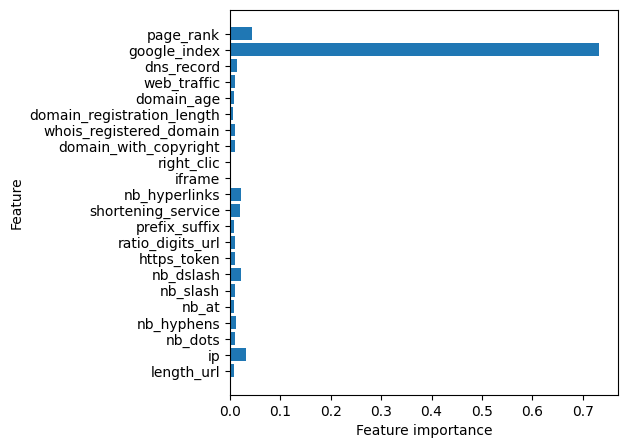

In [53]:
plt.figure(figsize=(5,5))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgboost.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [54]:
Y_test.describe()

count    2286.000000
mean        0.494751
std         0.500082
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64

In [55]:
Y_test

6406    0
4266    1
1238    1
2646    1
2217    0
       ..
3775    1
1255    0
5126    0
8618    0
8748    0
Name: status, Length: 2286, dtype: int64

In [56]:
test_array = [[21, 0, 2, 0, 0, 2, 0, 1, 0.0, 0, 0, 302, 0, 0, 0, 0, 0, 8126, 61324, 0, 0, 4]]

In [57]:
feature_names = ['length_url', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_slash', 'nb_dslash', 'https_token', 'ratio_digits_url', 'prefix_suffix', 'shortening_service', 'nb_hyperlinks', 'iframe', 'right_clic', 'domain_with_copyright', 'whois_registered_domain', 'domain_registration_length', 'domain_age', 'web_traffic', 'dns_record', 'google_index', 'page_rank']

In [58]:
Newframe = pd.DataFrame(test_array, columns= feature_names)
Newframe.head()

,length_url,ip,nb_dots,nb_hyphens,nb_at,nb_slash,nb_dslash,https_token,ratio_digits_url,prefix_suffix,...,iframe,right_clic,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,21,0,2,0,0,2,0,1,0.0,0,...,0,0,0,0,0,8126,61324,0,0,4


In [59]:
New_pred = xgboost.predict(Newframe)
New_pred

array([0])